<a href="https://colab.research.google.com/github/pawel0508/MachineLearningBootcamp_I/blob/master/DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from sklearn import datasets
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix


sns.set(font_scale = 1.3)
np.random.seed(42)


In [2]:
raw_digits = datasets.load_digits()
digits = raw_digits.copy()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [11]:
images = digits['images']
targets = digits['target']

In [12]:
print(f'images shape: {images.shape}')
print(f'targets shape: {targets.shape}')

images shape: (1797, 8, 8)
targets shape: (1797,)


In [17]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Wizualizacja obrazów

In [18]:
plt.figure(figsize = (12, 10))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

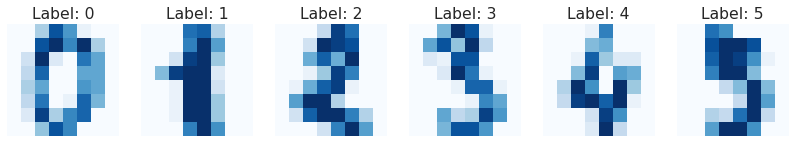

In [26]:
plt.figure(figsize = (14, 12))
for index, (image, target) in enumerate(list(zip(images, targets))[:6]):
  plt.subplot(2, 6, index + 1)
  plt.axis('off')
  plt.imshow(image, cmap = 'Blues')
  plt.title(f'Label: {target}')


Przygotowanie danych do modelu


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, targets)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')



X_train shape: (1347, 8, 8)
X_test shape: (450, 8, 8)
y_train shape: (1347,)
y_test shape: (450,)


In [37]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print()
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')


X_train shape: (1347, 64)
X_test shape: (450, 64)


In [38]:
X_train[0]

array([ 0.,  0.,  9.,  9.,  4.,  0.,  0.,  0.,  0.,  0., 15., 15., 14.,
       12.,  0.,  0.,  0.,  3., 10.,  1.,  0., 12.,  5.,  0.,  0.,  5.,
        8.,  0.,  0.,  8.,  6.,  0.,  0.,  8.,  8.,  0.,  0.,  8.,  8.,
        0.,  0.,  5.,  8.,  0.,  0., 10.,  6.,  0.,  0.,  4., 13.,  4.,
        6., 13.,  0.,  0.,  0.,  0.,  6., 16., 14.,  3.,  0.,  0.])

In [39]:
y_train[0]

0

Trenowanie modelu

In [41]:
from sklearn.svm import SVC

classifier = SVC(gamma=0.001, kernel='linear')
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.9755555555555555

In [42]:
classifier = SVC(gamma=0.001, kernel='rbf')
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.9911111111111112

In [43]:
y_pred = classifier.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      0.93      0.96        41
           4       1.00      1.00      1.00        38
           5       0.97      1.00      0.99        39
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        48
           8       0.98      1.00      0.99        52
           9       1.00      0.98      0.99        45

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [46]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 52,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 44]])

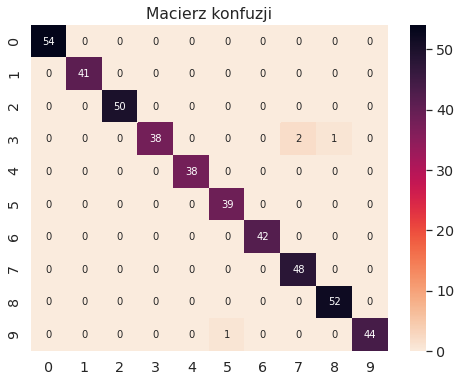

In [47]:
plt.figure(figsize=(8, 6))
plt.title('Macierz konfuzji')
_ = sns.heatmap(cm, annot=True, cmap=sns.cm.rocket_r)

In [48]:
columns = ['pred_' + str(i) for i in range(10)]
index = ['true_' + str(i) for i in range(10)]

def plot_confusion_matrix(cm):
    # Mulitclass classification, 3 classes
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=columns, index=index[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=700, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

Błędne predykcje

In [49]:
results = pd.DataFrame(data={'y_pred': y_pred, 'y_test': y_test})
results.head(10)

errors = results[results['y_pred'] != results['y_test']]
errors_idxs = list(errors.index)
errors_idxs


[182, 286, 334, 438]

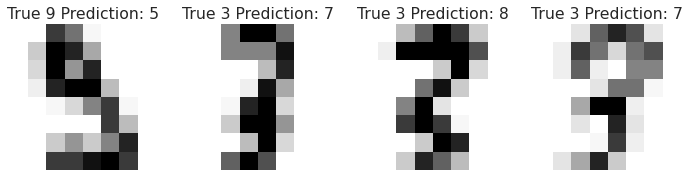

In [50]:

plt.figure(figsize=(12, 10))
for idx, error_idx in enumerate(errors_idxs[:4]):
    image = X_test[error_idx].reshape(8, 8) # ten fragment jest istotny bo wracamy do wyjściowego wymiaru
    plt.subplot(2, 4, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f"True {results.loc[error_idx, 'y_test']} Prediction: {results.loc[error_idx, 'y_pred']}")